In [1]:
import numpy as np

### Ejercicio 3

Se desea simular la evolución de una epidemia utilizando el modelo S.I.R.

Se  conoce  que  inicialmente  el  3%  de  la  población  se  encuentra  infectada,  toda  la  población  es  susceptible  de contagiarse, la tasa de transmisión α=0,27, y la tasa de recuperación β=0,043.

Se pide:
1. Implementar el modelo SIR correspondiente.
2. Graficar las curvas de porcentajes de personas sanas, infectadas y recuperadas, de forma que se vea la evolución de la epidemia.
3. Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 30% de la población a la vez, determine la duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de asistencia médica. ¿Qué parámetros modifica? ¿Por qué?
4. Pruebe con 3 distintos juegos de parámetros del modelo y comente los comportamientos explorados. Compare estos resultados con los obtenidos en el Ejercicio 2

El modelo SIR es uno de los modelos epidemiológicos más simples capaces de capturar muchas de las características típicas de los brotes epidémicos. El nombre del modelo proviene de las iniciales S (población susceptible), I (población infectada) y R (población recuperada). El modelo relaciona las variaciones de las tres poblaciones (Susceptible, Infectada y Recuperada) a través de la tasa de infección y el período infeccioso promedio.

$$
\frac{dS}{dt} = - \beta * S * I \\
\frac{dI}{dt} = \beta * S * I - \gamma * I \\ 
\frac{dR}{dt} = \gamma * I \\
$$

In [68]:
# Valores de S, I y R segun enunciado
s_0 = 0.97
i_0 = 0.03
r_0 = 0

In [69]:
def SIR_model(beta, gamma):
    def f(X): 
        x1 = -beta * X[0] * X[1]
        x2 = beta * X[0] * X[1] - gamma * X[1]
        x3 = gamma * X[1]
        return np.array([x1, x2, x3])
    return f

In [70]:
def rk4(f, X0, h, tiempo):
    n = int(tiempo/h) # cantidad de pasos
    
    steps_t = [0]
    steps_val = [X0]
    
    for i in range(1, n):
        k1 = h * f(steps_val[i-1])
        k2 = h * f(steps_val[i-1] + 0.5 * k1)
        k3 = h * f(steps_val[i-1] + 0.5 * k2)
        k4 = h * f(steps_val[i-1] + k3)
        steps_t.append(round(steps_t[i-1] + h, 1))
        steps_val.append(np.array(steps_val[i-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)))
    
    return steps_t, steps_val

In [71]:
alfa = 0.27
beta = 0.043
sm_alfa_beta = SIR_model(alfa, beta)

X_0 = np.array([s_0, i_0, r_0])

tiempo_total = 150
h = 0.1

tiempos, valores = rk4(sm_alfa_beta, X_0, h, tiempo_total)

2. Graficar las curvas de porcentajes de personas sanas, infectadas y recuperadas, de forma que se vea la evolución de la epidemia.

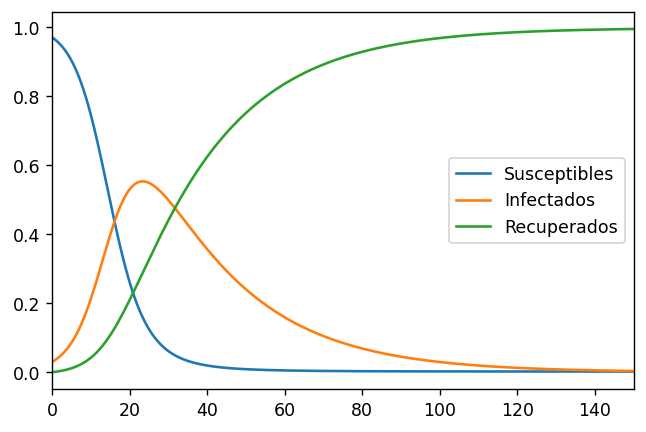

In [72]:
import matplotlib.pyplot as plt

susceptibles = list(map(lambda x: x[0], valores))
infectados = list(map(lambda x: x[1], valores))
recuperados = list(map(lambda x: x[2], valores))

plt.figure(dpi=125)
plt.plot(tiempos, susceptibles, label= "Susceptibles")
plt.plot(tiempos, infectados, label= "Infectados")
plt.plot(tiempos, recuperados, label= "Recuperados")
plt.xlim(0,tiempo_total)
plt.legend()
plt.show()

3. Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 30% de la población a la vez, determine la duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de asistencia médica. ¿Qué parámetros modifica? ¿Por qué?

Para ver cuándo el sistema se satutaría con el modelo actual, tomamos la curva de porcentaje de infectados y la comparamos contra la capacidad del sistema de salud para evaluar el instante en tiempo en que se colapsa el sistema (si es que ocurre).

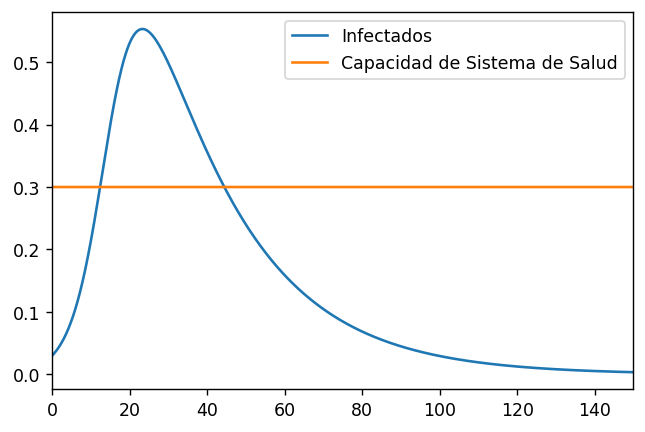

In [73]:
infectados = list(map(lambda x: x[1], valores))
capacidad = [0.3 for i in range(len(infectados))]

plt.figure(dpi=125)
plt.plot(tiempos, infectados, label= "Infectados")
plt.plot(tiempos, capacidad, label= "Capacidad de Sistema de Salud")
plt.xlim(0,tiempo_total)
plt.legend()
plt.show()

Vemos que rapidamente el sistema colapsa, ya en los primeros instantes de la simulacion utilizando el modelo SIR. 

Por lo tanto, si se quisiera evitar esto partiendo de la misma situación inicial (97% de personas nunca contagidas y 3% de infectados), seria necesario buscar variar los parametros de tasa de transmisión α y tasa de recuperación β para que el sistema de salud pueda abordar la problemática sin llegar a saturarse.

Procederemos a evaluar el mismo planteo, con distintas combinaciones de parámetros:

In [94]:
# Distintas combinaciones de parametros
alfas = [0.75, 0.5, 0.25]
betas = [0.03, 0.06, 0.12, 0.24]

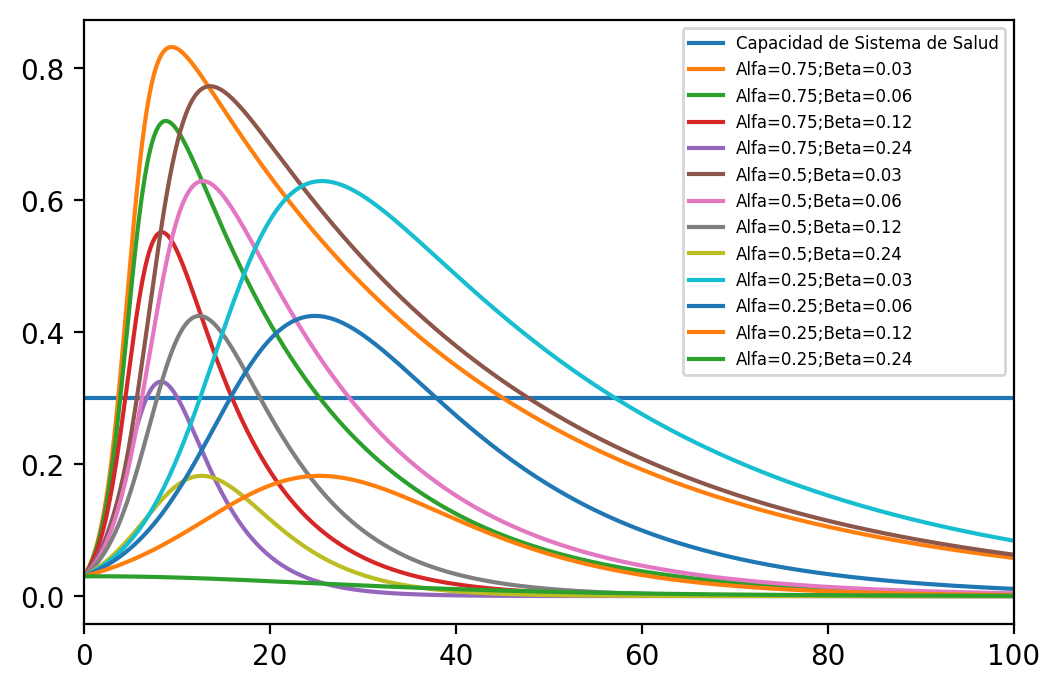

In [96]:
tiempo_total = 100
h = 0.1

plt.figure(dpi=200)
tiempos = np.arange(start=0, stop=100, step=0.1)
capacidad = [0.3 for i in range(len(tiempos))]
plt.plot(tiempos, capacidad, label= "Capacidad de Sistema de Salud")

for alfa in alfas:
    for beta in betas: 
        modelo = SIR_model(alfa, beta)
        X_0 = np.array([s_0, i_0, r_0])
        tiempos, valores = rk4(modelo, X_0, h, tiempo_total)
        
        infectados = list(map(lambda x: x[1], valores))

        plt.plot(tiempos, infectados, label= "Alfa={};Beta={}".format(alfa, beta))
        
plt.xlim(0,tiempo_total)
plt.legend(fontsize=6)

Como podemos ver en este gráfico, tanto disminuir la tasa de transmisión como aumentar la tasa de recuperación alivian el impacto de la epidemia en el sistema de salud. Lo cual tiene sentido, ya que eso implica que la gente se contagia en forma más paulatina y la recuperación es más rápida.

De hecho, en el gráfico podemos observar que para mismos valores de Alfa, el pico se da practicamente en los mismos instantes de tiempo, y que a medida que este valor disminuye, este pico se presenta más retrasado en el tiempo. Por el lado de Beta, vemos que su implicancia radica en el máximo que toma dicho pico, y que a mayor Beta, los picos son mucho menores.

De las distintas combinaciones de parámetros, se logra que no se supere la capacidad del sistema de salud para los siguientes valores:
- Alfa = 0.5 ; Beta = 0.24
- Alfa = 0.25 ; Beta = 0.12
- Alfa = 0.25 ; Beta = 0.24

Es pertinente remarcar también que la combinación `Alfa = 0.75 ; Beta = 0.24`, es decir, al utilizar una tasa de recuperación mucho mas alta que la planteada originalmente, casi que apenas supera la capacidad.

Comparando con lo observado en el Ejercicio 2, vemos en estos gráficos y en el último de la simulación de dicho ejercicio que las curvas de personas sanas e infectadas tienen una disposición similar. La diferencia radica en que en el ejercicio 2 se plantearon otros 3 estados posibles (hospitalizado, con ventilador, muertos) y que en este caso solo contamos con la curva de recuperados, que tiene un comportamiento similar a la de muertos, ya que ambos estados son los terminales en sus respectivas simulaciones (si plantearamos los diagramas de estados de cada una).

Además, podemos encontrar una similitud entre variar los parámetros Alfa y Beta, con variar las probabilidades de la matriz de Markov planteada en el Ejercicio 2, ya que efectivamente modificando dichos parámetros, las probabilidades de infectarse y de pasar a recuperarse son menores y mayores respectivamente.